In [2]:
import netCDF4 as nc
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Setting up the variables and dataset
fn = 'Data.nc'
data1 = xr.open_dataset(fn)
# (testing with 1 year so that code runs faster)
data = data1.sel(time=slice('2003-04', '2004-04'))
SM = data['SoilMoist_S_tavg']
Temp = data['AvgSurfT_tavg']
ET = data['Evap_tavg']
time = data['time']

In [4]:
# finding the 40th percentile of soil moisture at each raster
fourty_percentile = SM.quantile(0.4,dim='time')

C:\Users\I-SMART_Lab_03\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [5]:
# checking whether the soil moisture value at each raster is less than the 40th percentile value we calculated above
SM_percentile_truth = SM<fourty_percentile

In [6]:
# finding the monthly means for temperature
Temp_monthly_means = Temp.groupby("time.month").mean("time")

In [21]:
# finding the standardized Temp anomalies based on monthly means (method 1)
temp_anomalies1 = (Temp.groupby("time.month") - Temp_monthly_means)
# dividing the difference by the monthly standard deviations
temp_anomalies = temp_anomalies1.groupby("time.month")/(Temp.groupby("time.month").std("time"))
# printing the array of anomalies
temp_anomalies

<xarray.DataArray 'AvgSurfT_tavg' (time: 396, lat: 38, lon: 41)>
array([[[        nan,         nan,         nan, ...,  0.26856223,
          0.4316638 ,  0.49906152],
        [        nan,         nan,         nan, ...,  0.2271762 ,
          0.44793707,  0.5377994 ],
        [        nan,         nan,         nan, ...,  0.28644785,
          0.4784222 ,  0.56607455],
        ...,
        [        nan,         nan, -0.5285096 , ...,  0.6983873 ,
          0.87694454,  1.0635418 ],
        [        nan,         nan, -0.59970236, ...,  0.70087504,
          0.81810325,  0.9595931 ],
        [        nan, -0.6315927 , -0.6369127 , ...,  0.726181  ,
          0.7418089 ,  0.8583048 ]],

       [[        nan,         nan,         nan, ..., -0.66320735,
         -0.6545301 , -0.6455729 ],
        [        nan,         nan,         nan, ..., -0.678503  ,
         -0.66698575, -0.6549849 ],
        [        nan,         nan,         nan, ..., -0.71768683,
         -0.6589331 , -0.6429805 ],
...
        [        nan,         nan,  1.6368858 , ..., -0.8844879 ,
         -0.95448875, -0.93215585],
        [        nan,         nan,  1.5591211 , ..., -0.948162  ,
         -0.9263012 , -0.9449181 ],
        [        nan,  1.7590147 ,  1.4800749 , ..., -0.8689843 ,
         -0.90483284, -0.8220107 ]],

       [[        nan,         nan,         nan, ...,  0.8542388 ,
          0.794712  ,  0.74432385],
        [        nan,         nan,         nan, ...,  0.8568156 ,
          0.7391439 ,  0.67708206],
        [        nan,         nan,         nan, ...,  0.7318767 ,
          0.60882694,  0.5657654 ],
        ...,
        [        nan,         nan,  1.6295383 , ...,  0.4935441 ,
          0.42315176,  0.37906906],
        [        nan,         nan,  1.6477618 , ...,  0.38074467,
          0.36449373,  0.3373942 ],
        [        nan,  1.4257693 ,  1.6716579 , ...,  0.28040266,
          0.2523218 ,  0.2716118 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2003-04-01 2003-04-02 ... 2004-04-30
  * lon      (lon) float32 -124.4 -124.1 -123.9 -123.6 ... -114.9 -114.6 -114.4
  * lat      (lat) float32 32.62 32.88 33.12 33.38 ... 41.12 41.38 41.62 41.88
    month    (time) int64 4 4 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4 4

In [30]:
# calculating the standardized anomalies for temperature with the monthly means and monthly standard deviations (method 2)
Temp_monthly_means = Temp.groupby("time.month").mean("time")
Temp_monthly_std = Temp.groupby("time.month").std("time")
Temp_stand_anomalies = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    Temp.groupby("time.month"),
    Temp_monthly_means,
    Temp_monthly_std,
)


In [31]:
# printing the temperature standardized anomalies method 2
# looking at the 2 different methods they produce the same output 
Temp_stand_anomalies

<xarray.DataArray 'AvgSurfT_tavg' (time: 396, lat: 38, lon: 41)>
array([[[        nan,         nan,         nan, ...,  0.26856223,
          0.4316638 ,  0.49906152],
        [        nan,         nan,         nan, ...,  0.2271762 ,
          0.44793707,  0.5377994 ],
        [        nan,         nan,         nan, ...,  0.28644785,
          0.4784222 ,  0.56607455],
        ...,
        [        nan,         nan, -0.5285096 , ...,  0.6983873 ,
          0.87694454,  1.0635418 ],
        [        nan,         nan, -0.59970236, ...,  0.70087504,
          0.81810325,  0.9595931 ],
        [        nan, -0.6315927 , -0.6369127 , ...,  0.726181  ,
          0.7418089 ,  0.8583048 ]],

       [[        nan,         nan,         nan, ..., -0.66320735,
         -0.6545301 , -0.6455729 ],
        [        nan,         nan,         nan, ..., -0.678503  ,
         -0.66698575, -0.6549849 ],
        [        nan,         nan,         nan, ..., -0.71768683,
         -0.6589331 , -0.6429805 ],
...
        [        nan,         nan,  1.6368858 , ..., -0.8844879 ,
         -0.95448875, -0.93215585],
        [        nan,         nan,  1.5591211 , ..., -0.948162  ,
         -0.9263012 , -0.9449181 ],
        [        nan,  1.7590147 ,  1.4800749 , ..., -0.8689843 ,
         -0.90483284, -0.8220107 ]],

       [[        nan,         nan,         nan, ...,  0.8542388 ,
          0.794712  ,  0.74432385],
        [        nan,         nan,         nan, ...,  0.8568156 ,
          0.7391439 ,  0.67708206],
        [        nan,         nan,         nan, ...,  0.7318767 ,
          0.60882694,  0.5657654 ],
        ...,
        [        nan,         nan,  1.6295383 , ...,  0.4935441 ,
          0.42315176,  0.37906906],
        [        nan,         nan,  1.6477618 , ...,  0.38074467,
          0.36449373,  0.3373942 ],
        [        nan,  1.4257693 ,  1.6716579 , ...,  0.28040266,
          0.2523218 ,  0.2716118 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2003-04-01 2003-04-02 ... 2004-04-30
  * lon      (lon) float32 -124.4 -124.1 -123.9 -123.6 ... -114.9 -114.6 -114.4
  * lat      (lat) float32 32.62 32.88 33.12 33.38 ... 41.12 41.38 41.62 41.88
    month    (time) int64 4 4 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4 4

In [24]:
# check whether Temp anomalies is greater than 1 standard deviation 
# standard deviation is based on monthly standard deviations
Temp_truth = Temp_stand_anomalies.groupby("time.month") > Temp_monthly_std
Temp_truth

<xarray.DataArray 'AvgSurfT_tavg' (time: 396, lat: 38, lon: 41)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * time     (time) datetime64[ns] 2003-04-01 2003-04-02 ... 2004-04-30
  * lon      (lon) float32 -124.4 -124.1 -123.9 -123.6 ... -114.9 -114.6 -114.4
  * lat      (lat) float32 32.62 32.88 33.12 33.38 ... 41.12 41.38 41.62 41.88
    month    (time) int64 4 4 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4 4

In [25]:
# finding the standardized monthly means for evapotranspiration with monthly means and monthly standard deviations
ET_monthly_means = ET.groupby("time.month").mean("time")
ET_monthly_std = ET.groupby("time.month").std("time")
ET_stand_anomalies = xr.apply_ufunc(
    lambda x, m, s: (x - m) / s,
    ET.groupby("time.month"),
    ET_monthly_means,
    ET_monthly_std,
)

In [26]:
# checking if ET anomaly is positive
ET_truth = ET_stand_anomalies > 0

In [27]:
ET_truth

<xarray.DataArray 'Evap_tavg' (time: 396, lat: 38, lon: 41)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        [False, False,  True, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False,  True, ..., False,  True,  True],
        [False, False,  True, ...,  True, False, False],
        [False,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False,  True, ..., False,  True,  True],
        [False, False,  True, ..., False, False,  True],
        [False,  True,  True, ..., False, False,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False,  True, ...,  True,  True,  True],
        [False, False,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True]]])
Coordinates:
  * time     (time) datetime64[ns] 2003-04-01 2003-04-02 ... 2004-04-30
  * lon      (lon) float32 -124.4 -124.1 -123.9 -123.6 ... -114.9 -114.6 -114.4
  * lat      (lat) float32 32.62 32.88 33.12 33.38 ... 41.12 41.38 41.62 41.88
    month    (time) int64 4 4 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4 4

In [32]:
# Now putting it all together
# checking if SM < 40th percentile, ET Anomaly is positive and Temperature anomaly is greater than one standard deviation
# Since truth values correspond to the number 1 and false values correspond to the value 0
# If we multiply the three conditions' truth values and the result is 1 this means that all conditions are true
# and there is a high chance that flash drought occured
truth_values = (SM_percentile_truth * ET_truth * Temp_truth ) == 1
truth_values

<xarray.DataArray (time: 396, lat: 38, lon: 41)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * time      (time) datetime64[ns] 2003-04-01 2003-04-02 ... 2004-04-30
  * lon       (lon) float32 -124.4 -124.1 -123.9 -123.6 ... -114.9 -114.6 -114.4
  * lat       (lat) float32 32.62 32.88 33.12 33.38 ... 41.12 41.38 41.62 41.88
    quantile  float64 0.4
    month     (time) int64 4 4 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4 4 4

In [33]:
# This array does not tell us much since it is very big therefore we need methods to visualize this data
m = truth_values.mean(dim='time')
m

<xarray.DataArray (lat: 38, lon: 41)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * lon       (lon) float32 -124.4 -124.1 -123.9 -123.6 ... -114.9 -114.6 -114.4
  * lat       (lat) float32 32.62 32.88 33.12 33.38 ... 41.12 41.38 41.62 41.88
    quantile  float64 0.4

Text(0.5, 1.0, 'mean of truth values')

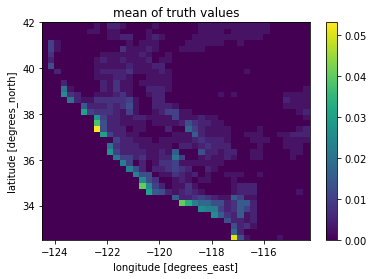

In [34]:
truth_values.mean(dim='time').plot()
plt.title("mean of truth values")

Text(0.5, 1.0, 'areas with at least 1 flash drought event for 1 year')

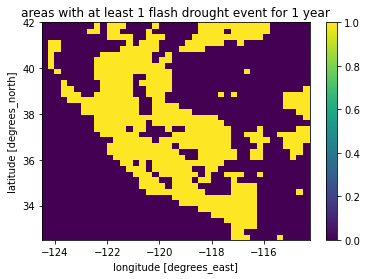

In [37]:
# looking at areas with atleast 1 flash drought event
fe = m>0
fe.plot()
plt.title("areas with at least 1 flash drought event for 1 year")

In [41]:
# getting the counts of flash drought events (the frequency of events)
flashDrought_frequency = truth_values.count("time")

In [42]:
flashDrought_frequency

<xarray.DataArray (lat: 38, lon: 41)>
array([[396, 396, 396, ..., 396, 396, 396],
       [396, 396, 396, ..., 396, 396, 396],
       [396, 396, 396, ..., 396, 396, 396],
       ...,
       [396, 396, 396, ..., 396, 396, 396],
       [396, 396, 396, ..., 396, 396, 396],
       [396, 396, 396, ..., 396, 396, 396]])
Coordinates:
  * lon       (lon) float32 -124.4 -124.1 -123.9 -123.6 ... -114.9 -114.6 -114.4
  * lat       (lat) float32 32.62 32.88 33.12 33.38 ... 41.12 41.38 41.62 41.88
    quantile  float64 0.4

In [52]:
# getting the sum of flash drought events (the frequency of events)
frequency = truth_values.sum("time")
frequency

<xarray.DataArray (lat: 38, lon: 41)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * lon       (lon) float32 -124.4 -124.1 -123.9 -123.6 ... -114.9 -114.6 -114.4
  * lat       (lat) float32 32.62 32.88 33.12 33.38 ... 41.12 41.38 41.62 41.88
    quantile  float64 0.4

Text(0.5, 1.0, 'Frequency of flash drought events from 2003-04 to 2004-04')

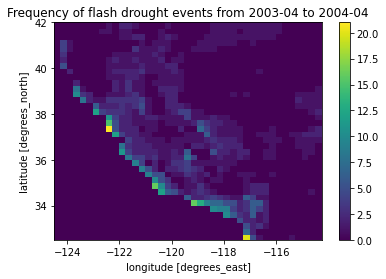

In [55]:
# plotting the frequency of flash drought events 
frequency.plot()
plt.title("Frequency of flash drought events from 2003-04 to 2004-04")